In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/ara_proje_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/benign/aug_0_5669.png  
  inflating: train/benign/aug_0_6396.png  
  inflating: train/benign/aug_0_821.png  
  inflating: train/benign/aug_0_4940.png  
  inflating: train/benign/aug_0_10.png  
  inflating: train/benign/aug_0_9248.png  
  inflating: train/benign/aug_0_6968.png  
  inflating: train/benign/aug_0_6599.png  
  inflating: train/benign/aug_0_6012.png  
  inflating: train/benign/aug_0_2732.png  
  inflating: train/benign/aug_0_6190.png  
  inflating: train/benign/aug_0_824.png  
  inflating: train/benign/aug_0_9575.png  
  inflating: train/benign/aug_0_9135.png  
  inflating: train/benign/aug_0_7581.png  
  inflating: train/benign/aug_0_9464.png  
  inflating: train/benign/aug_0_3309.png  
  inflating: train/benign/aug_0_8782.png  
  inflating: train/benign/aug_0_6508.png  
  inflating: train/benign/aug_0_5852.png  
  inflating: train/benign/aug_0_783.png  
  inflating: train/benign/aug_0_3259.png  
  inflat

In [3]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint




# --- 1. YENİ PARAMETRELER ---
DATA_ROOT = "/content/" # Olası kök dizin
IMAGE_SIZE = (224, 224)
NEW_LEARNING_RATE = 0.0001
MAX_EPOCHS = 50
PATIENCE = 5
BATCH_SIZE = 32

# --- 2. CALLBACK'LERİN TANIMLANMASI ---

# 5 epoch boyunca val_loss iyileşmezse eğitimi durdur ve en iyi ağırlıkları geri yükle
early_stopping = EarlyStopping(
monitor='val_loss',
patience=PATIENCE,# Sabır değeri
restore_best_weights=True,# En iyi ağırlıkları yükle
verbose=1
)

# Her epoch sonunda en iyi val_loss değerine sahip ağırlıkları kaydet
checkpoint_filepath = '/tmp/ResNet_best_weights_lr0001.weights.h5'
model_checkpoint = ModelCheckpoint(
filepath=checkpoint_filepath,
monitor='val_loss',
save_best_only=True,
verbose=1
)

# --- 3. VERİ YÜKLEYİCİLERİ (DOĞRU NORMALİZASYON) ---
datagen_rescale = ImageDataGenerator(rescale=1./255) # 0-1 Normalizasyonu

train_generator = datagen_rescale.flow_from_directory(
DATA_ROOT + 'train', target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='categorical'
)
valid_generator = datagen_rescale.flow_from_directory(
DATA_ROOT + 'valid', target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
)

# --- 4. MODEL TANIMI (Feature Extraction) ---


base_model = ResNet50(weights='imagenet',
                      include_top=False,
                      pooling='avg',
                      input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))



base_model.trainable = False

x = base_model.output
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# --- 5. MODELİ DERLEME VE EĞİTİM ---
print(f"ResNet modeli LR={NEW_LEARNING_RATE} ile derleniyor...")

model.compile(optimizer=Adam(learning_rate=NEW_LEARNING_RATE),
loss='categorical_crossentropy',
metrics=['accuracy'])

print(f"\n--- ResNet Eğitimi Başlıyor (LR: {NEW_LEARNING_RATE}, Max Epoch: {MAX_EPOCHS}) ---\n")

history = model.fit(
train_generator,
epochs=MAX_EPOCHS,
validation_data=valid_generator,
callbacks=[early_stopping, model_checkpoint] # Callbacks eklendi
)

Found 7031 images belonging to 3 classes.
Found 120 images belonging to 3 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
ResNet modeli LR=0.0001 ile derleniyor...

--- ResNet Eğitimi Başlıyor (LR: 0.0001, Max Epoch: 50) ---



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.3319 - loss: 1.5109
Epoch 1: val_loss improved from inf to 1.07250, saving model to /tmp/ResNet_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 48s 160ms/step - accuracy: 0.3319 - loss: 1.5103 - val_accuracy: 0.5583 - val_loss: 1.0725
Epoch 2/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.3345 - loss: 1.2411
Epoch 2: val_loss improved from 1.07250 to 1.06752, saving model to /tmp/ResNet_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.3345 - loss: 1.2410 - val_accuracy: 0.6083 - val_loss: 1.0675
Epoch 3/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.3313 - loss: 1.1896
Epoch 3: val_loss improved from 1.06752 to 1.05925, saving model to /tmp/ResNet_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.3314 - loss: 1.1895 - val_accuracy: 0.6083 - val_loss: 1.0592
Epoch 4/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.3562 - loss: 1.1393
Epoch 4: val_loss improved from 1.05925 to 1.05663, saving model to /tmp/ResNet_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.3562 - loss: 1.1392 - val_accuracy: 0.5917 - val_loss: 1.0566
Epoch 5/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.3610 - loss: 1.1180
Epoch 5: val_loss did not improve from 1.05663
220/220 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.3610 - loss: 1.1180 - val_accuracy: 0.5167 - val_loss: 1.0771
Epoch 6/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.3721 - loss: 1.1088
Epoch 6: val_loss did not improve from 1.05663
220/220 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.3721 - loss: 1.1088 - val_accuracy: 0.6250 - val_loss: 1.0589
Epoch 7/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.3791 - loss: 1.0951
Epoch 7: val_loss improved from 1.05663 to 1.02706, saving model to /tmp/ResNet_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.3791 - loss: 1.0951 - val_accuracy: 0.5667 - val_loss: 1.0271
Epoch 8/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.4023 - loss: 1.0830
Epoch 8: val_loss did not improve from 1.02706
220/220 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.4022 - loss: 1.0830 - val_accuracy: 0.6250 - val_loss: 1.0345
Epoch 9/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.4021 - loss: 1.0831
Epoch 9: val_loss did not improve from 1.02706
220/220 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.4021 - loss: 1.0831 - val_accuracy: 0.6250 - val_loss: 1.0463
Epoch 10/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.4209 - loss: 1.0755
Epoch 10: val_loss did not improve from 1.02706
220/220 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.4209 - loss: 1.0755 - val_accuracy: 0.5833 - val_loss: 1.0517
Epoch 11/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.4313 - loss: 1.0689
Epoch 11: val_loss did not impro

In [4]:
# Eğitimin temel metriklerini yazdıralım
print("\n--- EĞİTİM VE VALIDASYON ÖZETİ (HISTORY) ---")

# En iyi Validasyon Accuracy'i bulma
best_val_acc = max(history.history['val_accuracy'])
print(f"En Yüksek Validasyon Accuracy: {best_val_acc:.4f}")

# Sonuçları Training Seti üzerinde değerlendirelim
# Training Seti performansı (genellikle çok yüksektir)
train_results = model.evaluate(train_generator, verbose=0)
print(f"Training Seti Accuracy: {train_results[1]:.4f}")
print(f"Training Seti Loss: {train_results[0]:.4f}")


--- EĞİTİM VE VALIDASYON ÖZETİ (HISTORY) ---
En Yüksek Validasyon Accuracy: 0.6250
Training Seti Accuracy: 0.3837
Training Seti Loss: 1.0712


Found 115 images belonging to 3 classes.

--- NASNet (Makale Ayarları) TEST SETİ Metrikleri Hesaplanıyor ---



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step
Test Accuracy: 0.5739
Test Recall (Duyarlılık): 0.3666
Test Precision (Kesinlik): 0.3470
Test F1-Score: 0.3200


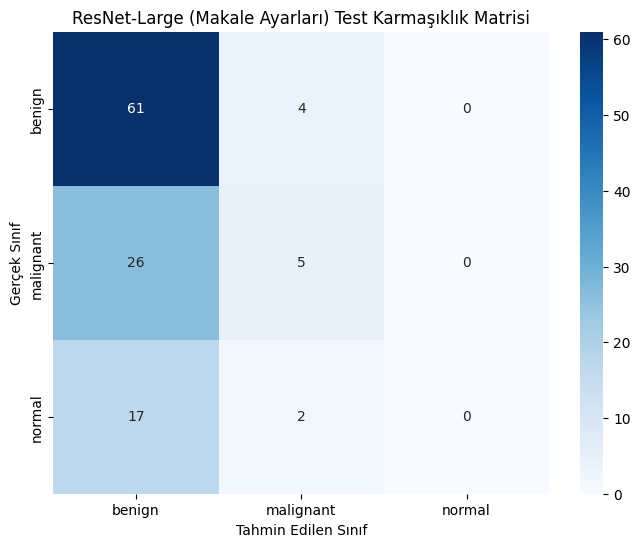


--- Tabloya Eklenecek Sonuçlar ---

ResNet-Large (Makale Ayarları) | Accuracy: 0.5739 | Recall: 0.3666 | Precision: 0.3470 | F1-Score: 0.3200

Karmaşıklık Matrisi (nasnet_makale_confusion_matrix.png) oluşturuldu.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# --- 1. TEST VERİ YÜKLEYİCİSİ (Normalizasyon: 0-1) ---
# Makale ayarlarına uygun olarak 0-1 normalizasyonunu kullanmalıyız.
datagen_test = ImageDataGenerator(rescale=1./255)

# Test generator'ı oluştur. Shuffle=False kritik!
test_generator = datagen_test.flow_from_directory(
    DATA_ROOT + 'test',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False # Sınıfları doğru eşleştirmek için KARŞTIRMA KAPALI olmalı
)

# --- 2. TAHMİN VE METRİK HESAPLAMA ---

print("\n--- NASNet (Makale Ayarları) TEST SETİ Metrikleri Hesaplanıyor ---\n")

test_steps = int(np.ceil(test_generator.samples / BATCH_SIZE))
y_pred_proba_test = model.predict(test_generator, steps=test_steps)
y_pred_test = y_pred_proba_test.argmax(axis=1) # Olasılıklardan en yüksek olanın indeksini al
y_true_test = test_generator.classes # Gerçek etiketleri al

# Sınıf isimlerini al (Örn: benign, malignant, normal)
class_labels = list(test_generator.class_indices.keys())

# Metrikler
accuracy_test = accuracy_score(y_true_test, y_pred_test)
recall_test = recall_score(y_true_test, y_pred_test, average='macro', zero_division=0)
precision_test = precision_score(y_true_test, y_pred_test, average='macro', zero_division=0)
f1_test = f1_score(y_true_test, y_pred_test, average='macro', zero_division=0)

print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Test Recall (Duyarlılık): {recall_test:.4f}")
print(f"Test Precision (Kesinlik): {precision_test:.4f}")
print(f"Test F1-Score: {f1_test:.4f}")

# --- 3. KARMAŞIKLIK MATRİSİ (CONFUSION MATRIX) OLUŞTURMA ---

cm = confusion_matrix(y_true_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
             xticklabels=class_labels,
             yticklabels=class_labels)
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('ResNet-Large (Makale Ayarları) Test Karmaşıklık Matrisi')
plt.savefig('resnet_makale_confusion_matrix.png')
plt.show()

print("\n--- Tabloya Eklenecek Sonuçlar ---\n")
print(f"ResNet-Large (Makale Ayarları) | Accuracy: {accuracy_test:.4f} | Recall: {recall_test:.4f} | Precision: {precision_test:.4f} | F1-Score: {f1_test:.4f}")
print("\nKarmaşıklık Matrisi (nasnet_makale_confusion_matrix.png) oluşturuldu.")